# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [151]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings 

warnings.filterwarnings('ignore')




In [152]:
data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [154]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column are missing, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [157]:
data.isnull().sum()

ApplicationDate                   0
Age                             100
AnnualIncome                      0
CreditScore                       0
EmploymentStatus                  0
EducationLevel                    0
Experience                        0
LoanAmount                        0
LoanDuration                      0
MaritalStatus                   100
NumberOfDependents                0
HomeOwnershipStatus               0
MonthlyDebtPayments               0
CreditCardUtilizationRate         0
NumberOfOpenCreditLines           0
NumberOfCreditInquiries           0
DebtToIncomeRatio                 0
BankruptcyHistory                 0
LoanPurpose                       0
PreviousLoanDefaults              0
PaymentHistory                    0
LengthOfCreditHistory             0
SavingsAccountBalance             0
CheckingAccountBalance            0
TotalAssets                       0
TotalLiabilities                  0
MonthlyIncome                     0
UtilityBillsPaymentHistory  

In [158]:
print("Total number of columns before deleting",len(data.columns))

Total number of columns before deleting 36


## 1. If over 50% of the values of a column, the column should be removed from the data frame;

In [160]:
##From the above output, we can see that Age , MaritalStatus and RiskScore has null values in it.
data = data.loc[:, data.isnull().mean() < 0.5]

In [161]:
##After this point, the columns which are having the null values over 50% are removed

print("Total number of columns after deleting",len(data.columns))
data.isnull().sum()

Total number of columns after deleting 35


ApplicationDate                 0
Age                           100
AnnualIncome                    0
CreditScore                     0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
LoanAmount                      0
LoanDuration                    0
MaritalStatus                 100
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments             0
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory               0
LoanPurpose                     0
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance          0
TotalAssets                     0
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
NetWorth      

## 2. For a categorical column, if a row contains a missing value, you need to delete the whole row;

In [163]:
## Fetching the categorical columns
cat_columns = data.select_dtypes(include=['object']).columns
cat_columns

Index(['ApplicationDate', 'EmploymentStatus', 'EducationLevel',
       'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [164]:
##Printing the missing values count for all the categorical variables
data[cat_columns].isnull().sum()

ApplicationDate          0
EmploymentStatus         0
EducationLevel           0
MaritalStatus          100
HomeOwnershipStatus      0
LoanPurpose              0
dtype: int64

In [165]:
##Printing the data before deleting the missing data
print("before deleting, the length of data is:", len(data))
data.isna().sum()

before deleting, the length of data is: 20000


ApplicationDate                 0
Age                           100
AnnualIncome                    0
CreditScore                     0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
LoanAmount                      0
LoanDuration                    0
MaritalStatus                 100
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments             0
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory               0
LoanPurpose                     0
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance          0
TotalAssets                     0
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
NetWorth      

In [166]:
##Checking if the categorical columns has null/missing data and deleting
data = data.dropna(subset=cat_columns)


In [167]:
#Printing the data after deleting the missing data
print("After deleting, the length of data is:", len(data))
data.isna().sum()

After deleting, the length of data is: 19900


ApplicationDate                 0
Age                           100
AnnualIncome                    0
CreditScore                     0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
LoanAmount                      0
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments             0
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory               0
LoanPurpose                     0
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance          0
TotalAssets                     0
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
NetWorth      

## 3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [169]:
##Fetching the numerical columns
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved'],
      dtype='object')

In [170]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [171]:
##Printing the count of missing values in numerical columns
data[numeric_columns].isnull().sum()
data.isna().sum()

ApplicationDate                 0
Age                           100
AnnualIncome                    0
CreditScore                     0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
LoanAmount                      0
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments             0
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory               0
LoanPurpose                     0
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance          0
TotalAssets                     0
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
NetWorth      

In [172]:
##Replacing the null values in numerical columns using mean or average value with the help of fillna method
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [173]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [174]:
#Checking if there is any null values after replacing and size of data
print("The length of data is:", len(data))
data.isna().sum()


The length of data is: 19900


ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [175]:
##At this point, we can notice that there are no missing values in numerical columns

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

## 1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.

In [178]:
print("Before deleting, the size of data is", len(data))
print("Before deleting, the total number of columns are" , len(data.columns))

Before deleting, the size of data is 19900
Before deleting, the total number of columns are 35


In [179]:
##Dopping all the data which has unique values.
del_col = []
for column in cat_columns:
    if data[column].nunique() == len(data):
        del_col.append(column)
        data.drop(columns=[column], inplace=True)

###Printing the size of data after deleting and also total number of columns
print("After deleting, the size of data is", len(data))
print("After deleting, the total number of columns are" , len(data.columns))

cat_columns = data.select_dtypes(include=['object']).columns

After deleting, the size of data is 19900
After deleting, the total number of columns are 34


In [180]:
##At this point, we can see that 1 columns got deleted
print("The deleted columns are" , del_col)

The deleted columns are ['ApplicationDate']


## 2. Use one hot encoding to convert the categorical values into numerical ones.

In [268]:
##Using get dummies method to perform one hot encoding
data = pd.get_dummies(data, drop_first=True)

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

## 1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.

In [186]:
##Storing all the features except target variable by deleting the target variable in the variable X
X = data.drop(columns='LoanApproved')

##Storing the target variable in the y
y = data['LoanApproved']

print(X.head())
print(y.head())


    Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
0  45.0         39948          617          22       13152            48   
1  38.0         39709          628          15       26045            48   
2  47.0         40724          570          26       17627            36   
3  58.0         69084          545          34       37898            96   
4  37.0        103264          594          17        9184            36   

   NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
0                   2                  183                   0.354418   
1                   1                  496                   0.087827   
2                   2                  902                   0.137414   
3                   1                  755                   0.267587   
4                   1                  274                   0.320535   

   NumberOfOpenCreditLines  ...  MaritalStatus_Married  MaritalStatus_Single  \
0                       

## 2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [188]:
##Splitting of data into test and train using train_test_split function
##Here defining the test size as 0.2 to make train dataset having 80% data and test dataset containing 20%

X_train  , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state= 47943734)
print("The size of train dataset is :", X_train.shape)
print("The size of test dataset is :", X_test.shape)
X_train

The size of train dataset is : (15920, 44)
The size of test dataset is : (3980, 44)


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
17806,38.0,173277,599,16,39114,72,2,372,0.154224,1,...,False,True,False,False,False,True,True,False,False,False
10271,35.0,26761,605,12,18866,48,2,437,0.150644,4,...,True,False,False,False,False,False,False,False,True,False
1967,38.0,84794,576,16,27625,60,0,352,0.418209,3,...,False,True,False,False,False,False,False,False,False,True
7966,52.0,19334,641,34,47269,36,1,436,0.210201,3,...,True,False,False,False,False,False,False,False,True,False
14539,24.0,33986,545,3,14975,24,1,330,0.108546,2,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,30.0,32144,558,7,16382,12,4,682,0.265124,3,...,True,False,False,False,False,True,False,False,True,False
17175,59.0,49734,638,36,24744,84,4,355,0.127306,3,...,True,False,False,True,False,False,False,False,True,False
995,36.0,40615,641,14,28238,24,0,300,0.308129,2,...,False,True,False,False,False,False,False,True,False,False
15033,60.0,52368,576,40,12376,72,0,340,0.203186,2,...,False,True,False,True,False,False,False,True,False,False


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

## 1. Train a logistic regression model

In [191]:
##INtializing a Logistic regression model
logistic_regression_model = LogisticRegression()

##Training the model using fit method by providing training dataset
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

## 2. Report two classification performance metrics (accuracy and f1-score) on the testing data

In [193]:
##Predicting the results on test data
y_pred = logistic_regression_model.predict(X_test)

##Determining the performance of logistic regression model using accuracy_score and f1_score as performance metrics

##Using accuracy_score method to find the accuracy on test data
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression model on test data is:", accuracy_test)

##Using f1_score method to find the f1_score on test data
f1_score_test = f1_score(y_test, y_pred)
print("f1_score of logistic regression model on test data is:", f1_score_test)


Accuracy of logistic regression model on test data is: 0.8826633165829145
f1_score of logistic regression model on test data is: 0.7435475013728721


## 3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [195]:
##Finding the performance metrics for train data

##Predicting the results on train data
y_pred_train = logistic_regression_model.predict(X_train)

##Using accuracy_score method to find the accuracy on train data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy of logistic regression model on train data is:", accuracy_train)

##Using f1_score method to find the f1_score on train data
f1_score_train= f1_score(y_train, y_pred_train)
print("f1_score of logistic regression model on train data is:", f1_score_train)

Accuracy of logistic regression model on train data is: 0.8904522613065327
f1_score of logistic regression model on train data is: 0.7540891144952059


In [196]:
##Justification
##With 89% accuracy and a 75% F1-score on the training set, the logistic regression model performs admirably. We must contrast these measures with the test data to see if the model is overfitting. The model is probably overfitting if the test metrics are noticeably lower. If they are near, overfitting is not an issue because the model is generalizing effectively.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

## 1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.

In [199]:
total_features = X_train.shape[1]
print(total_features)

44


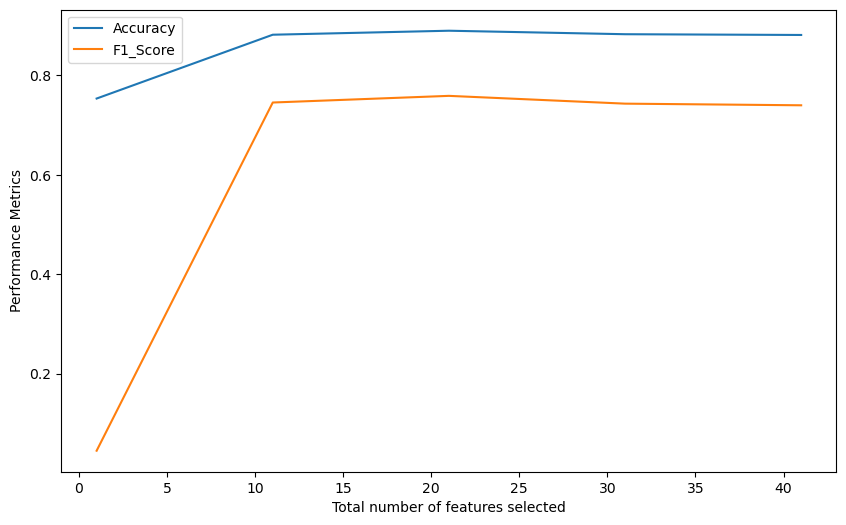

In [200]:
total_features = X_train.shape[1]
##Storing all the accuracy in the below list
accuracy_list = []

##Storing all the f1_scores in the below list
f1_score_list= []

##Performing rfe using all the features
for i in range(0,total_features,10):
    rfe = RFE(logistic_regression_model, n_features_to_select=i+1)
    rfe.fit(X_train, y_train)
    y_rfe_pred = rfe.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_rfe_pred))
    f1_score_list.append(f1_score(y_test, y_rfe_pred))

## Ploting the preformance metrics- accuracy and f1_score
plt.figure(figsize=(10, 6))
plt.plot(range(1, total_features, 10), accuracy_list, label='Accuracy')
plt.plot(range(1, total_features,10), f1_score_list, label='F1_Score')

plt.xlabel('Total number of features selected')
plt.ylabel('Performance Metrics')
plt.legend()
plt.show()


## 2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [202]:
##From the above graph, the optimal number of features can be 12
optimal_n_features = 12

##Performing RFE with optimal number of features
rfe = RFE(estimator=logistic_regression_model, n_features_to_select=optimal_n_features)
X_rfe = rfe.fit_transform(X_train, y_train)

##Fetching the selected features
selected_features = X.columns[rfe.support_]


## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

## 1.Select the features identifed in Step 2.3 for this task

In [206]:
print("Selected features:", selected_features)

Selected features: Index(['Age', 'Experience', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'LengthOfCreditHistory', 'UtilityBillsPaymentHistory', 'InterestRate',
       'TotalDebtToIncomeRatio', 'EducationLevel_High School',
       'EducationLevel_Master', 'MaritalStatus_Married',
       'HomeOwnershipStatus_Rent'],
      dtype='object')


## 2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data

In [208]:
## Updating the X_train and X_test dataset with the selected features only.
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

##BUilding a KNN model with k-value as 1
##Initating KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train_new, y_train)

##Predicting the values using test dataset
y_pred_knn = knn_model.predict(X_test_new)

##Determining the performance metrics - accuracy and f1_score for test data
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

print("Accuracy of knn classifier on test data is", accuracy_knn)
print("f1_score of knn classifier on test data is", f1_score_knn)

Accuracy of knn classifier on test data is 0.6934673366834171
f1_score of knn classifier on test data is 0.3769152196118488


## 3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [210]:
##Determining the performance metrics - accuracy and f1_score for train data
y_pred_knn_train = knn_model.predict(X_train_new)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
f1_score_knn_train = f1_score(y_train, y_pred_knn_train)

print("Accuracy of knn classifier on train data is", accuracy_knn_train)
print("f1_score of knn classifier on train data is", f1_score_knn_train)

Accuracy of knn classifier on train data is 1.0
f1_score of knn classifier on train data is 1.0


In [211]:
##Justifications
##Overfitting is clearly suggested by the KNN model's perfect accuracy (1.0) and F1-score (1.0) on the training set. This indicates that the model has retained the information in the training set, but it probably does not generalize well to new data. It is confirmed that the model is incapable of capturing broad patterns if the performance on the test set is noticeably worse. Methods like simplifying the model, utilizing cross-validation, or implementing regularization strategies must to be taken into consideration in order to lessen this overfitting.

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

## 1.User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.

In [214]:
##Defining parameter grid
param_grid = {'n_neighbors': range(1, 31)}

##Implementing GridSearchCV with cross-validation
grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_cv.fit(X_train_new, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

## 2.Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

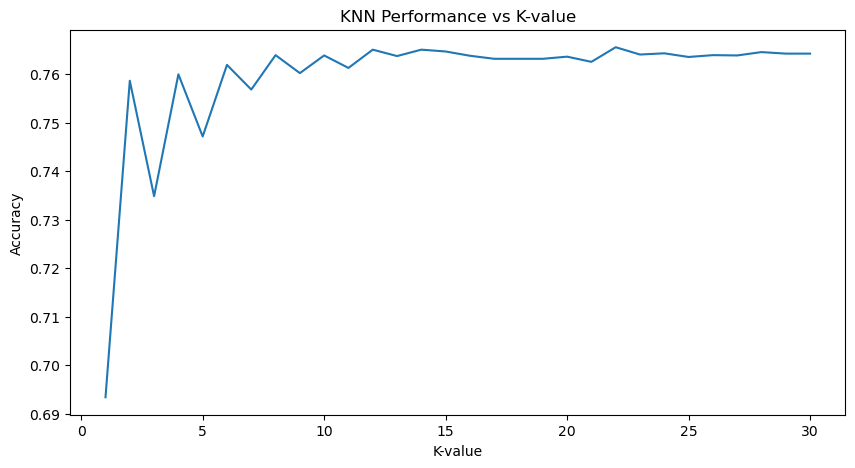

In [216]:
##Visualizing the performance change wrt k value
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), grid_search_cv.cv_results_['mean_test_score'])
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs K-value')
plt.show()


In [217]:
##Best K-value wrt performance
best_k_value = grid_search_cv.best_params_['n_neighbors']
print("Best k-value is", best_k_value)

best_knn = grid_search_cv.best_estimator_

##Predicting the values using best knn
y_pred_knn_best = best_knn.predict(X_test_new)

##Determining the best performance metrics- accuracy and f1_score
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
f1_score_knn_best = f1_score(y_test, y_pred_knn_best)

print("Accuracy using the best case for knn model is", accuracy_knn_best)
print("f1_score using the best case for knn model is", f1_score_knn_best)


Best k-value is 22
Accuracy using the best case for knn model is 0.7580402010050251
f1_score using the best case for knn model is 0.0784688995215311


### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

## 1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.

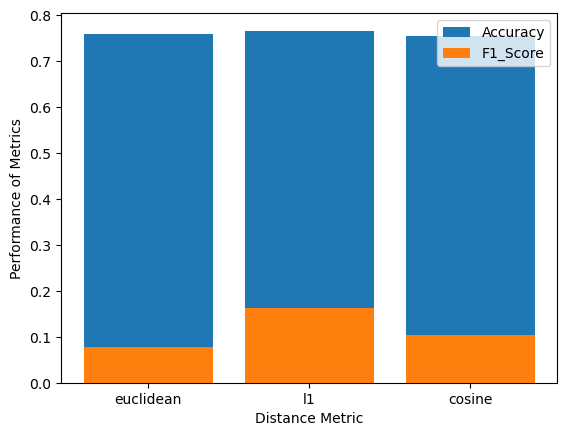

In [220]:
##Defining the distance metrics
distance_metrics = ['euclidean', 'l1', 'cosine']
##Initializing accuracy and f1_score lists
accuracy_list_knn = []
f1_score_list_knn = []

for i in distance_metrics:
    ##Initializing the KNN classifier using best k value wrt each metrics
    knn_model = KNeighborsClassifier(n_neighbors=best_k_value, metric=i)
    knn_model.fit(X_train[selected_features], y_train)

    ##Predicting the values on test data
    y_pred_new_knn = knn_model.predict(X_test[selected_features])

    ##Determing the performance metrics - accuracy and f1_score on test data
    accuracy_list_knn.append(accuracy_score(y_test, y_pred_new_knn))
    f1_score_list_knn.append(f1_score(y_test, y_pred_new_knn))

##Plotting the bar chart for accuracy and f1_score
plt.bar(distance_metrics, accuracy_list_knn, label='Accuracy')
plt.bar(distance_metrics, f1_score_list_knn, label='F1_Score')
plt.xlabel("Distance Metric")
plt.ylabel("Performance of Metrics")
plt.legend()
plt.show()



## 2.Compare the performance metrics, which is the best? Which is the worst?

In [222]:
##finding the best accuracy and f1_score using max function from the accuracy and f1_score lists
best_accuracy = distance_metrics[accuracy_list_knn.index(max(accuracy_list_knn))]
best_f1_score = distance_metrics[f1_score_list_knn.index(max(f1_score_list_knn))]

##finding the worst accuracy and f1_score using min function from the accuracy and f1_score lists
worst_accuracy = distance_metrics[accuracy_list_knn.index(min(accuracy_list_knn))]
worst_f1_score = distance_metrics[f1_score_list_knn.index(min(f1_score_list_knn))]


In [223]:
##From the above values obtained
print("Best performance Metric for Accuracy is :", best_accuracy)
print("Best performance Metric for F1_Score is: ", best_f1_score)
print("Worst performance Metric for Accuracy is: ", worst_accuracy)
print("Worst performance Metric for F1_Score is :", worst_f1_score)

Best performance Metric for Accuracy is : l1
Best performance Metric for F1_Score is:  l1
Worst performance Metric for Accuracy is:  cosine
Worst performance Metric for F1_Score is : euclidean
